In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
class PolynomialLeastSquares:
    """
    Clase para regresión polinomial usando ecuaciones normales.
    Modelo: h(X; θ) = θ₀ + θ₁x + θ₂x² + ... + θₙxᴺ
    """
    
    def __init__(self):
        self.theta = None
        self.X_train = None
        self.y_train = None
        self.N = None
    
    def load_data(self, csv_path: str):
        """Carga datos desde CSV"""
        data = pd.read_csv(csv_path)
        return data['X'].values, data['y'].values
    
    def fit(self, X: np.ndarray, y: np.ndarray, N: int):
        """Ajusta el modelo polinomial de grado N"""
        self.X_train = X.copy()
        self.y_train = y.copy()
        self.N = N
        
        # Matriz de diseño [1, x, x², x³, ..., xᴺ]
        X_design = np.zeros((len(X), N + 1))
        for j in range(N + 1):
            X_design[:, j] = X ** j
        
        # Ecuaciones normales: θ = (X^T X)^(-1) X^T y
        self.theta = np.linalg.solve(X_design.T @ X_design, X_design.T @ y)
    
    def predict(self, X: np.ndarray):
        """Predicciones del modelo"""
        result = np.zeros_like(X)
        for j in range(self.N + 1):
            result += self.theta[j] * (X ** j)
        return result
    
    def error(self):
        """Error cuadrático medio"""
        predictions = self.predict(self.X_train)
        return np.mean((self.y_train - predictions) ** 2)
    
    def plot(self, title_suffix=""):
        """Gráfica datos y modelo"""
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X_train, self.y_train, alpha=0.7, label='Datos', color='blue')
        
        X_line = np.linspace(self.X_train.min(), self.X_train.max(), 200)
        y_line = self.predict(X_line)
        plt.plot(X_line, y_line, 'r-', linewidth=2, label=f'Polinomio N={self.N}')
        
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Regresión Polinomial N={self.N} - MSE: {self.error():.4f}{title_suffix}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


Parámetros ajustados (θ): [ -0.1814891    0.41430346   8.20039693 -12.27702137   7.3595365
  -5.37202314   1.85993366]
Error cuadrático medio: 0.15658267719533484


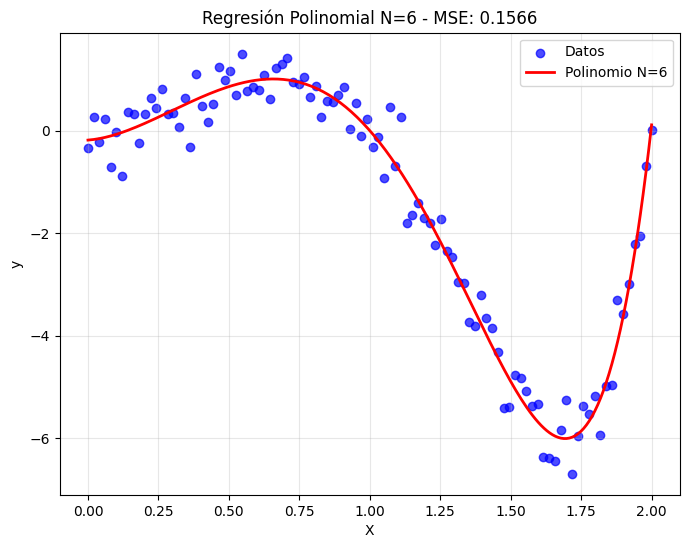

In [8]:
model = PolynomialLeastSquares()
X, y = model.load_data('Polynomial.csv')
model.fit(X, y, N=6)
print("Parámetros ajustados (θ):", model.theta)
print("Error cuadrático medio:", model.error())
model.plot()